In [2]:
import nltk
import spacy
import pandas as pd
import numpy as np
import sklearn
import plotly
import re
import string
import os
import multiprocessing as mp
import spacy
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
nlp = spacy.load('en_core_web_sm')


In [3]:
#nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [8]:
n_rows = 100000
df_raw = pd.read_csv("amazon_reviews.csv").head(n_rows)
df_raw.head(5)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [ ]:
#Adding 123 infront of first review to test and make sure cleaning function is operating properly
df_raw.iloc[0, 3] = "123 No issues."
df_raw.head(5)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,123 No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [ ]:
#Cleaning function to remove special characters and numbers and creates a new column with them
df_raw['reviewText'] = df_raw['reviewText'].astype(str)
def clean(text):
  text = re.sub('[^A-Za-z]+', ' ', text)
  return text





In [ ]:
# Cleaning the text in the review column
df_raw['Cleaned Reviews'] = df_raw['reviewText'].apply(clean)
df_raw.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,Cleaned Reviews
0,0,NaN,4.0,123 No issues.,2014-07-23,138,0,0,0,0,0.0,0.0,No issues
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,Purchased this for my device it worked as adve...
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,it works as expected I should have sprung for ...
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,This think has worked out great Had a diff bra...
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,Bought it with Retail Packaging arrived legit ...


In [ ]:
#Creating POS Tagging clumn and removing stop words
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}



def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df_raw['POS tagged'] = df_raw['Cleaned Reviews'].apply(token_stop_pos)
df_raw.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pfurl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pfurl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pfurl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pfurl\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,Cleaned Reviews,POS tagged
0,0,NaN,4.0,123 No issues.,2014-07-23,138,0,0,0,0,0.0,0.0,No issues,"[(issues, n)]"
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,Purchased this for my device it worked as adve...,"[(Purchased, v), (device, n), (worked, v), (ad..."
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,it works as expected I should have sprung for ...,"[(works, v), (expected, v), (sprung, n), (high..."
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,This think has worked out great Had a diff bra...,"[(think, n), (worked, v), (great, a), (diff, n..."
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,Bought it with Retail Packaging arrived legit ...,"[(Bought, v), (Retail, n), (Packaging, n), (ar..."


In [ ]:
#creating column for Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            try:
                lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            except KeyError:
                lemma = word
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df_raw['Lemma'] = df_raw['POS tagged'].apply(lemmatize)
df_raw.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,Cleaned Reviews,POS tagged,Lemma
0,0,NaN,4.0,123 No issues.,2014-07-23,138,0,0,0,0,0.0,0.0,No issues,"[(issues, n)]",issue
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,Purchased this for my device it worked as adve...,"[(Purchased, v), (device, n), (worked, v), (ad...",Purchased device work advertised never much ...
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,it works as expected I should have sprung for ...,"[(works, v), (expected, v), (sprung, n), (high...",work expect sprung high capacity think make ...
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,This think has worked out great Had a diff bra...,"[(think, n), (worked, v), (great, a), (diff, n...",think work great diff bran gb card go south ...
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,Bought it with Retail Packaging arrived legit ...,"[(Bought, v), (Retail, n), (Packaging, n), (ar...",Bought Retail Packaging arrive legit orange ...


In [ ]:
#COMPARING LEXICONS
    #VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
dfClean = pd.DataFrame()
dfClean["id"] = df_raw.index + 1
dfClean["date"] = df_raw["reviewTime"]
dfClean["Originalreview"] = df_raw["reviewText"]
dfClean["reviews"] = df_raw["Lemma"]
dfClean["rating"] = df_raw["overall"]

dfClean.head()

,id,date,Originalreview,reviews,rating
0,1,2014-07-23,123 No issues.,issue,4.0
1,2,2013-10-25,"Purchased this for my device, it worked as adv...",Purchased device work advertised never much ...,5.0
2,3,2012-12-23,it works as expected. I should have sprung for...,work expect sprung high capacity think make ...,4.0
3,4,2013-11-21,This think has worked out great.Had a diff. br...,think work great diff bran gb card go south ...,5.0
4,5,2013-07-13,"Bought it with Retail Packaging, arrived legit...",Bought Retail Packaging arrive legit orange ...,5.0


In [ ]:
from tqdm.notebook import tqdm
#Run the polarity score on the entire dataset
res={}
for i, row in tqdm(dfClean.iterrows(),total=len(dfClean)):
  text = row["reviews"]
  id = row["id"]
  res[id] = sid.polarity_scores(text)

  0%|          | 0/4915 [00:00<?, ?it/s]

In [ ]:
VADER = pd.DataFrame(res).T
VADER = VADER.reset_index().rename(columns={"index":"id"})
VADER = VADER.merge(dfClean, how="right")

In [ ]:
#Data with polarity score
VADER

,id,neg,neu,pos,compound,date,Originalreview,reviews,rating
0,1,0.000,1.000,0.000,0.0000,2014-07-23,123 No issues.,issue,4.0
1,2,0.000,1.000,0.000,0.0000,2013-10-25,"Purchased this for my device, it worked as adv...",Purchased device work advertised never much ...,5.0
2,3,0.000,0.828,0.172,0.4019,2012-12-23,it works as expected. I should have sprung for...,work expect sprung high capacity think make ...,4.0
3,4,0.000,0.620,0.380,0.9201,2013-11-21,This think has worked out great.Had a diff. br...,think work great diff bran gb card go south ...,5.0
4,5,0.000,0.759,0.241,0.8591,2013-07-13,"Bought it with Retail Packaging, arrived legit...",Bought Retail Packaging arrive legit orange ...,5.0
...,...,...,...,...,...,...,...,...,...
4910,4911,0.130,0.733,0.137,0.0772,2013-07-23,I bought this Sandisk 16GB Class 10 to use wit...,buy Sandisk GB Class use HTC Inspire month g...,1.0
4911,4912,0.000,0.719,0.281,0.5095,2013-08-22,Used this for extending the capabilities of my...,Used extend capability Samsung Galaxy Note g...,5.0
4912,4913,0.000,0.709,0.291,0.8481,2014-03-31,Great card that is very fast and reliable. It ...,Great card fast reliable come optional adapt...,5.0
4913,4914,0.000,0.427,0.573,0.6908,2013-09-16,Good amount of space for the stuff I want to d...,Good amount space stuff want fit GoPro say,5.0


In [ ]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
VADER['vader analysis'] = VADER['compound'].apply(vader_analysis)
VADER.head()

,id,neg,neu,pos,compound,date,Originalreview,reviews,rating,vader analysis
0,1,0.0,1.000,0.000,0.0000,2014-07-23,123 No issues.,issue,4.0,Neutral
1,2,0.0,1.000,0.000,0.0000,2013-10-25,"Purchased this for my device, it worked as adv...",Purchased device work advertised never much ...,5.0,Neutral
2,3,0.0,0.828,0.172,0.4019,2012-12-23,it works as expected. I should have sprung for...,work expect sprung high capacity think make ...,4.0,Neutral
3,4,0.0,0.620,0.380,0.9201,2013-11-21,This think has worked out great.Had a diff. br...,think work great diff bran gb card go south ...,5.0,Positive
4,5,0.0,0.759,0.241,0.8591,2013-07-13,"Bought it with Retail Packaging, arrived legit...",Bought Retail Packaging arrive legit orange ...,5.0,Positive


In [ ]:
VADER['vader analysis'].value_counts()

vader analysis
Positive    2940
Neutral     1735
Negative     240
Name: count, dtype: int64

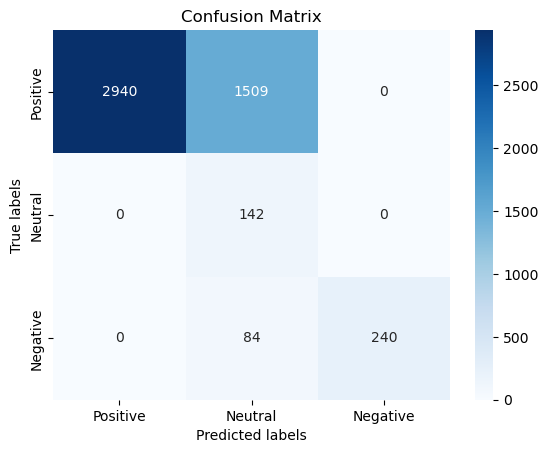

In [ ]:
#Vader Confusion Matrix
true_labels = ['Positive'] * 4449 + ['Neutral'] * 142 + ['Negative'] * 324

predicted_labels = ['Positive'] * 2940 + ['Neutral'] * 1735 + ['Negative'] * 240

# Define class labels
class_labels = ['Positive', 'Neutral', 'Negative']

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=class_labels)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

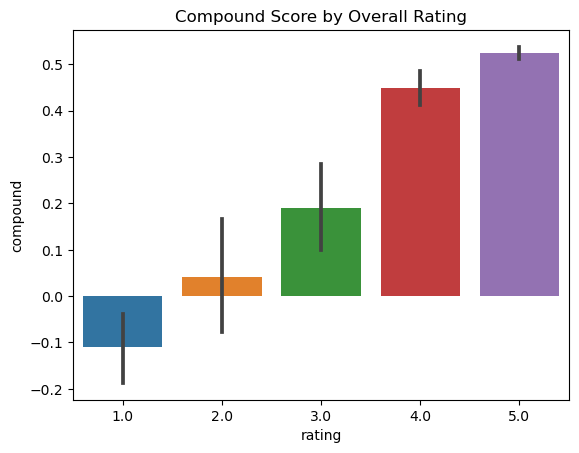

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
bp = sns.barplot(data=VADER, x="rating", y="compound")
bp.set_title("Compound Score by Overall Rating")
plt.show()

In [ ]:
#COMPARING LEXICONS
    #TEXTBLOB - #TextBlob is a Python library for processing textual data. It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.

from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
#Creating new dataframe for TextBlob results
BLOB = pd.DataFrame(dfClean)
BLOB

,id,date,Originalreview,reviews,rating
0,1,2014-07-23,123 No issues.,issue,4.0
1,2,2013-10-25,"Purchased this for my device, it worked as adv...",Purchased device work advertised never much ...,5.0
2,3,2012-12-23,it works as expected. I should have sprung for...,work expect sprung high capacity think make ...,4.0
3,4,2013-11-21,This think has worked out great.Had a diff. br...,think work great diff bran gb card go south ...,5.0
4,5,2013-07-13,"Bought it with Retail Packaging, arrived legit...",Bought Retail Packaging arrive legit orange ...,5.0
...,...,...,...,...,...
4910,4911,2013-07-23,I bought this Sandisk 16GB Class 10 to use wit...,buy Sandisk GB Class use HTC Inspire month g...,1.0
4911,4912,2013-08-22,Used this for extending the capabilities of my...,Used extend capability Samsung Galaxy Note g...,5.0
4912,4913,2014-03-31,Great card that is very fast and reliable. It ...,Great card fast reliable come optional adapt...,5.0
4913,4914,2013-09-16,Good amount of space for the stuff I want to d...,Good amount space stuff want fit GoPro say,5.0


In [ ]:
BLOB['Subjectivity'] = BLOB['reviews'].apply(getSubjectivity)
BLOB['Polarity'] = BLOB['reviews'].apply(getPolarity)
BLOB['Analysis'] = BLOB['Polarity'].apply(analysis)
BLOB.head()

,id,date,Originalreview,reviews,rating,Subjectivity,Polarity,Analysis
0,1,2014-07-23,123 No issues.,issue,4.0,0.000000,0.000000,Neutral
1,2,2013-10-25,"Purchased this for my device, it worked as adv...",Purchased device work advertised never much ...,5.0,0.200000,-0.100000,Negative
2,3,2012-12-23,it works as expected. I should have sprung for...,work expect sprung high capacity think make ...,4.0,0.635000,0.031667,Positive
3,4,2013-11-21,This think has worked out great.Had a diff. br...,think work great diff bran gb card go south ...,5.0,0.616667,0.350000,Positive
4,5,2013-07-13,"Bought it with Retail Packaging, arrived legit...",Bought Retail Packaging arrive legit orange ...,5.0,0.360000,0.386667,Positive


In [ ]:
BLOB.Analysis.value_counts()

Analysis
Positive    4132
Negative     451
Neutral      332
Name: count, dtype: int64

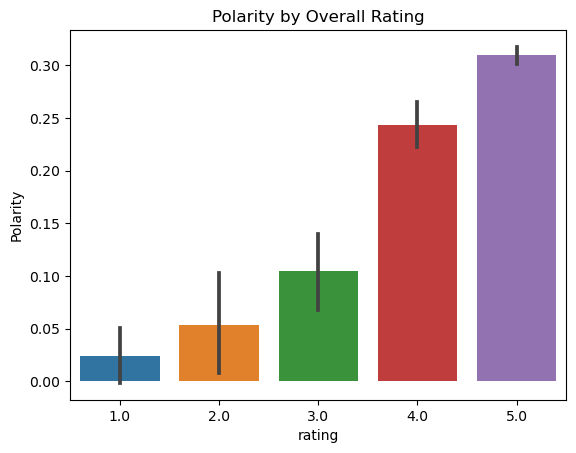

In [ ]:
blobplot = sns.barplot(data=BLOB, x="rating", y="Polarity")
blobplot.set_title("Polarity by Overall Rating")
plt.show()

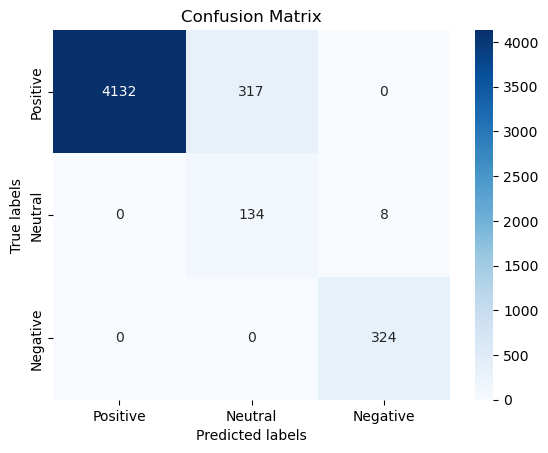

In [ ]:
#Textblob Confusion Matrix
true_labels = ['Positive'] * 4449 + ['Neutral'] * 142 + ['Negative'] * 324

predicted_labels = ['Positive'] * 4132 + ['Neutral'] * 451 + ['Negative'] * 332

# Define class labels
class_labels = ['Positive', 'Neutral', 'Negative']

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=class_labels)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#There's a big difference when comparying the value counts between the vader analysis and textblob analysis.
#Just looking at the first three reviews, both lexicons agree the first one is neutral, however, vader returns the next two as neutral as well while textblob returns them as positive.
#"works as advertised" and "works as expected" to me is more of a neutral statement so I would say vader is more accuarte in those cases.
#Comparing the barplots proves vader is more accurate as well.

In [ ]:
#Creating our own model - Naive Bayes using Clean Data Lemma
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#adding sentiment score 1= positive, -1 = negative, 0 = neutral
def label_row(value):
    if value == 5 or value == 4:
        return 1
    elif value == 2 or value == 1:
        return -1
    else:
        return 0

# Apply the function to create a new column with labels
df_raw['sentiment'] = df_raw['overall'].apply(lambda x: label_row(x))
df_raw

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,Cleaned Reviews,POS tagged,Lemma,sentiment
0,0,NaN,4.0,123 No issues.,2014-07-23,138,0,0,0,0,0.0,0.0,No issues,"[(issues, n)]",issue,1
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,Purchased this for my device it worked as adve...,"[(Purchased, v), (device, n), (worked, v), (ad...",Purchased device work advertised never much ...,1
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,it works as expected I should have sprung for ...,"[(works, v), (expected, v), (sprung, n), (high...",work expect sprung high capacity think make ...,1
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,This think has worked out great Had a diff bra...,"[(think, n), (worked, v), (great, a), (diff, n...",think work great diff bran gb card go south ...,1
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,Bought it with Retail Packaging arrived legit ...,"[(Bought, v), (Retail, n), (Packaging, n), (ar...",Bought Retail Packaging arrive legit orange ...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0,I bought this Sandisk GB Class to use with my ...,"[(bought, v), (Sandisk, n), (GB, n), (Class, n...",buy Sandisk GB Class use HTC Inspire month g...,-1
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0,Used this for extending the capabilities of my...,"[(Used, v), (extending, v), (capabilities, n),...",Used extend capability Samsung Galaxy Note g...,1
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0,Great card that is very fast and reliable It c...,"[(Great, n), (card, n), (fast, r), (reliable, ...",Great card fast reliable come optional adapt...,1
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0,Good amount of space for the stuff I want to d...,"[(Good, a), (amount, n), (space, n), (stuff, n...",Good amount space stuff want fit GoPro say,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_raw["Lemma"], df_raw["sentiment"], test_size=0.3, random_state=42)


In [ ]:
print("Shape of training data (x_train):", x_train.shape)
print("Shape of testing data (x_test):", x_test.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing labels (y_test):", y_test.shape)

Shape of training data (x_train): (3440,)
Shape of testing data (x_test): (1475,)
Shape of training labels (y_train): (3440,)
Shape of testing labels (y_test): (1475,)


In [ ]:
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [ ]:
naive = sklearn.naive_bayes.MultinomialNB()
naive.fit(x_train_vectorized, y_train)

MultinomialNB()

In [ ]:
predictions = naive.predict(x_test_vectorized)

In [ ]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))

Accuracy: 0.9335593220338984

Classification Report:
               precision    recall  f1-score   support

          -1       0.74      0.56      0.64       105
           0       0.00      0.00      0.00        40
           1       0.94      0.99      0.97      1330

    accuracy                           0.93      1475
   macro avg       0.56      0.52      0.54      1475
weighted avg       0.90      0.93      0.92      1475


Confusion Matrix:
 [[  59    0   46]
 [   9    0   31]
 [  12    0 1318]]


C:\Users\pfurl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pfurl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pfurl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
bad_review = np.array([""])
bad_review_vector = vectorizer.transform(bad_review)
naive.predict(bad_review_vector)

array([1], dtype=int64)

In [ ]:
#Creating our own model - Naive Bayes using unprocessed data
X_train, X_test, Y_train, Y_test = train_test_split(df_raw["reviewText"], df_raw["sentiment"], test_size=0.3, random_state=42)

In [ ]:
print("Shape of training data (X_train):", X_train.shape)
print("Shape of testing data (X_test):", X_test.shape)
print("Shape of training labels (y_train):", Y_train.shape)
print("Shape of testing labels (y_test):", Y_test.shape)

Shape of training data (X_train): (3440,)
Shape of testing data (X_test): (1475,)
Shape of training labels (y_train): (3440,)
Shape of testing labels (y_test): (1475,)


In [ ]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
rawNB = sklearn.naive_bayes.MultinomialNB()
rawNB.fit(X_train_vectorized, Y_train)

MultinomialNB()

In [ ]:
rawPredictions = rawNB.predict(X_test_vectorized)

In [ ]:
print("Accuracy:", accuracy_score(Y_test, rawPredictions))
print("\nClassification Report:\n", classification_report(Y_test, rawPredictions))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, rawPredictions))

Accuracy: 0.9322033898305084

Classification Report:
               precision    recall  f1-score   support

          -1       0.80      0.52      0.63       105
           0       0.00      0.00      0.00        40
           1       0.94      0.99      0.97      1330

    accuracy                           0.93      1475
   macro avg       0.58      0.51      0.53      1475
weighted avg       0.90      0.93      0.92      1475


Confusion Matrix:
 [[  55    0   50]
 [   5    0   35]
 [   9    1 1320]]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        70
           0       0.00      0.00      0.00        31
           1       0.90      1.00      0.95       882

    accuracy                           0.90       983
   macro avg       0.30      0.33      0.32       983
weighted avg       0.81      0.90      0.85       983



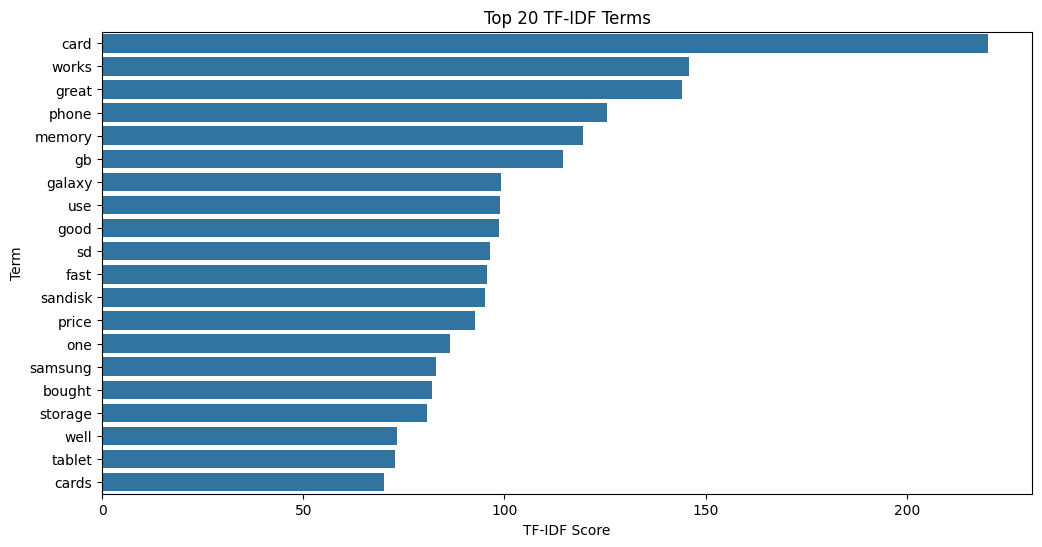

In [73]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Read the dataset and filter out 3-star reviews
df = pd.read_csv('amazon_reviews.csv')

def clean_text(text):
    if pd.notna(text):
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word.lower() not in stop_words]
        cleaned_text = ' '.join(tokens)
        return cleaned_text
    else:
        return ''


raw_text_data = df['reviewText']


cleaned_text = raw_text_data.apply(clean_text)

df['sentiment'] = df['overall'].apply(lambda x: label_row(x))


X_train, X_test, y_train, y_test = train_test_split(cleaned_text, df['sentiment'], test_size=0.2, random_state=40)


tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)


y_pred = nb_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


# Plot of the top TF-IDF terms
import matplotlib.pyplot as plt
import seaborn as sns


feature_names = tfidf_vectorizer.get_feature_names_out()


tfidf_values = X_train_tfidf.sum(axis=0).A1


tfidf_df = pd.DataFrame({'Term': feature_names, 'TF-IDF': tfidf_values})


tfidf_df = tfidf_df.sort_values(by='TF-IDF', ascending=False)


top_n = 20
plt.figure(figsize=(12, 6))
sns.barplot(x='TF-IDF', y='Term', data=tfidf_df.head(top_n))
plt.title(f'Top {top_n} TF-IDF Terms')
plt.xlabel('TF-IDF Score')
plt.ylabel('Term')
plt.show()



In [ ]:
#Re-running the models with the newly expanded data

In [7]:
newdf_raw = pd.read_csv("amazon_reviews_expanded.csv").head(n_rows)
newdf_raw.head(5)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,7/23/2014,138.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",10/25/2013,409.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,12/23/2012,715.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,11/21/2013,382.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",7/13/2013,513.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Cleaning function to remove special characters and numbers and creates a new column with them
newdf_raw['reviewText'] = newdf_raw['reviewText'].astype(str)

In [10]:
# Cleaning the text in the review column
newdf_raw['Cleaned Reviews'] = newdf_raw['reviewText'].apply(clean)
newdf_raw.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,Cleaned Reviews
0,0,NaN,4,No issues.,7/23/2014,138.0,0.0,0.0,0.0,0.0,0.0,0.0,No issues
1,1,0mie,5,"Purchased this for my device, it worked as adv...",10/25/2013,409.0,0.0,0.0,0.0,0.0,0.0,0.0,Purchased this for my device it worked as adve...
2,2,1K3,4,it works as expected. I should have sprung for...,12/23/2012,715.0,0.0,0.0,0.0,0.0,0.0,0.0,it works as expected I should have sprung for ...
3,3,1m2,5,This think has worked out great.Had a diff. br...,11/21/2013,382.0,0.0,0.0,0.0,0.0,0.0,0.0,This think has worked out great Had a diff bra...
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",7/13/2013,513.0,0.0,0.0,0.0,0.0,0.0,0.0,Bought it with Retail Packaging arrived legit ...


In [11]:
#Creating POS Tagging clumn and removing stop words
newdf_raw['POS tagged'] = newdf_raw['Cleaned Reviews'].apply(token_stop_pos)
newdf_raw.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,Cleaned Reviews,POS tagged
0,0,NaN,4,No issues.,7/23/2014,138.0,0.0,0.0,0.0,0.0,0.0,0.0,No issues,"[(issues, n)]"
1,1,0mie,5,"Purchased this for my device, it worked as adv...",10/25/2013,409.0,0.0,0.0,0.0,0.0,0.0,0.0,Purchased this for my device it worked as adve...,"[(Purchased, v), (device, n), (worked, v), (ad..."
2,2,1K3,4,it works as expected. I should have sprung for...,12/23/2012,715.0,0.0,0.0,0.0,0.0,0.0,0.0,it works as expected I should have sprung for ...,"[(works, v), (expected, v), (sprung, n), (high..."
3,3,1m2,5,This think has worked out great.Had a diff. br...,11/21/2013,382.0,0.0,0.0,0.0,0.0,0.0,0.0,This think has worked out great Had a diff bra...,"[(think, n), (worked, v), (great, a), (diff, n..."
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",7/13/2013,513.0,0.0,0.0,0.0,0.0,0.0,0.0,Bought it with Retail Packaging arrived legit ...,"[(Bought, v), (Retail, n), (Packaging, n), (ar..."


In [12]:
newdf_raw['Lemma'] = newdf_raw['POS tagged'].apply(lemmatize)
newdf_raw.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,Cleaned Reviews,POS tagged,Lemma
0,0,NaN,4,No issues.,7/23/2014,138.0,0.0,0.0,0.0,0.0,0.0,0.0,No issues,"[(issues, n)]",issue
1,1,0mie,5,"Purchased this for my device, it worked as adv...",10/25/2013,409.0,0.0,0.0,0.0,0.0,0.0,0.0,Purchased this for my device it worked as adve...,"[(Purchased, v), (device, n), (worked, v), (ad...",Purchased device work advertised never much ...
2,2,1K3,4,it works as expected. I should have sprung for...,12/23/2012,715.0,0.0,0.0,0.0,0.0,0.0,0.0,it works as expected I should have sprung for ...,"[(works, v), (expected, v), (sprung, n), (high...",work expect sprung high capacity think make ...
3,3,1m2,5,This think has worked out great.Had a diff. br...,11/21/2013,382.0,0.0,0.0,0.0,0.0,0.0,0.0,This think has worked out great Had a diff bra...,"[(think, n), (worked, v), (great, a), (diff, n...",think work great diff bran gb card go south ...
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",7/13/2013,513.0,0.0,0.0,0.0,0.0,0.0,0.0,Bought it with Retail Packaging arrived legit ...,"[(Bought, v), (Retail, n), (Packaging, n), (ar...",Bought Retail Packaging arrive legit orange ...


In [13]:
# Apply the function to create a new column with labels
newdf_raw['sentiment'] = newdf_raw['overall'].apply(lambda x: label_row(x))
newdf_raw

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,Cleaned Reviews,POS tagged,Lemma,sentiment
0,0,NaN,4,No issues.,7/23/2014,138.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,No issues,"[(issues, n)]",issue,1
1,1,0mie,5,"Purchased this for my device, it worked as adv...",10/25/2013,409.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Purchased this for my device it worked as adve...,"[(Purchased, v), (device, n), (worked, v), (ad...",Purchased device work advertised never much ...,1
2,2,1K3,4,it works as expected. I should have sprung for...,12/23/2012,715.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,it works as expected I should have sprung for ...,"[(works, v), (expected, v), (sprung, n), (high...",work expect sprung high capacity think make ...,1
3,3,1m2,5,This think has worked out great.Had a diff. br...,11/21/2013,382.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,This think has worked out great Had a diff bra...,"[(think, n), (worked, v), (great, a), (diff, n...",think work great diff bran gb card go south ...,1
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",7/13/2013,513.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Bought it with Retail Packaging arrived legit ...,"[(Bought, v), (Retail, n), (Packaging, n), (ar...",Bought Retail Packaging arrive legit orange ...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6910,6910,"Sara Knight ""Bookie""",3,Set in 2032 &#34;Crucifying Angel&#34; by P.I...,"01 5, 2014",432.261005,2.615705,0.376359,2.992063,2.239346,0.077619,0.021497,Set in Crucifying Angel by P I Barrington is a...,"[(Set, n), (Crucifying, n), (Angel, n), (P, n)...",Set Crucifying Angel P Barrington futuristic...,0
6911,6911,Doctorcrime,3,The story moves along rather slowly. I prefer ...,"05 25, 2013",432.259859,2.615998,0.376396,2.992394,2.239602,0.077619,0.021497,The story moves along rather slowly I prefer t...,"[(story, n), (moves, v), (along, None), (rathe...",story move along rather slowly prefer fast p...,0
6912,6912,Florence,3,I had a hard time to keep interest in this boo...,"10 13, 2012",432.258712,2.616291,0.376433,2.992724,2.239858,0.077620,0.021498,I had a hard time to keep interest in this boo...,"[(hard, a), (time, n), (keep, v), (interest, n...",hard time keep interest book really enjoy bo...,0
6913,6913,Lydia Wild,3,Good reading bit slow but gets interesting so ...,"09 8, 2013",432.257565,2.616584,0.376470,2.993054,2.240113,0.077620,0.021498,Good reading bit slow but gets interesting so ...,"[(Good, a), (reading, n), (bit, n), (slow, a),...",Good reading bit slow get interest u put nee...,0


In [15]:
newdfClean = pd.DataFrame()
newdfClean["id"] = newdf_raw.index + 1
newdfClean["date"] = newdf_raw["reviewTime"]
newdfClean["Originalreview"] = newdf_raw["reviewText"]
newdfClean["reviews"] = newdf_raw["Lemma"]
newdfClean["rating"] = newdf_raw["overall"]

newdfClean.head()

,id,date,Originalreview,reviews,rating
0,1,7/23/2014,No issues.,issue,4
1,2,10/25/2013,"Purchased this for my device, it worked as adv...",Purchased device work advertised never much ...,5
2,3,12/23/2012,it works as expected. I should have sprung for...,work expect sprung high capacity think make ...,4
3,4,11/21/2013,This think has worked out great.Had a diff. br...,think work great diff bran gb card go south ...,5
4,5,7/13/2013,"Bought it with Retail Packaging, arrived legit...",Bought Retail Packaging arrive legit orange ...,5


In [18]:
#Run the polarity score on the entire dataset
newres={}
for i, row in tqdm(newdfClean.iterrows(),total=len(newdfClean)):
  text = row["reviews"]
  id = row["id"]
  newres[id] = sid.polarity_scores(text)

  0%|          | 0/6915 [00:00<?, ?it/s]

In [19]:
newVADER = pd.DataFrame(newres).T
newVADER = newVADER.reset_index().rename(columns={"index":"id"})
newVADER = newVADER.merge(newdfClean, how="right")

In [20]:
#Data with compound score
newVADER

,id,neg,neu,pos,compound,date,Originalreview,reviews,rating
0,1,0.000,1.000,0.000,0.0000,7/23/2014,No issues.,issue,4
1,2,0.000,1.000,0.000,0.0000,10/25/2013,"Purchased this for my device, it worked as adv...",Purchased device work advertised never much ...,5
2,3,0.000,0.828,0.172,0.4019,12/23/2012,it works as expected. I should have sprung for...,work expect sprung high capacity think make ...,4
3,4,0.000,0.620,0.380,0.9201,11/21/2013,This think has worked out great.Had a diff. br...,think work great diff bran gb card go south ...,5
4,5,0.000,0.759,0.241,0.8591,7/13/2013,"Bought it with Retail Packaging, arrived legit...",Bought Retail Packaging arrive legit orange ...,5
...,...,...,...,...,...,...,...,...,...
6910,6911,0.201,0.518,0.281,0.3818,"01 5, 2014",Set in 2032 &#34;Crucifying Angel&#34; by P.I...,Set Crucifying Angel P Barrington futuristic...,3
6911,6912,0.192,0.685,0.123,-0.1280,"05 25, 2013",The story moves along rather slowly. I prefer ...,story move along rather slowly prefer fast p...,3
6912,6913,0.083,0.533,0.384,0.7264,"10 13, 2012",I had a hard time to keep interest in this boo...,hard time keep interest book really enjoy bo...,3
6913,6914,0.000,0.543,0.457,0.7096,"09 8, 2013",Good reading bit slow but gets interesting so ...,Good reading bit slow get interest u put nee...,3


In [21]:
newVADER['vader analysis'] = newVADER['compound'].apply(vader_analysis)
newVADER.head()

,id,neg,neu,pos,compound,date,Originalreview,reviews,rating,vader analysis
0,1,0.0,1.000,0.000,0.0000,7/23/2014,No issues.,issue,4,Neutral
1,2,0.0,1.000,0.000,0.0000,10/25/2013,"Purchased this for my device, it worked as adv...",Purchased device work advertised never much ...,5,Neutral
2,3,0.0,0.828,0.172,0.4019,12/23/2012,it works as expected. I should have sprung for...,work expect sprung high capacity think make ...,4,Neutral
3,4,0.0,0.620,0.380,0.9201,11/21/2013,This think has worked out great.Had a diff. br...,think work great diff bran gb card go south ...,5,Positive
4,5,0.0,0.759,0.241,0.8591,7/13/2013,"Bought it with Retail Packaging, arrived legit...",Bought Retail Packaging arrive legit orange ...,5,Positive


In [22]:
newVADER['vader analysis'].value_counts()

Positive    4219
Neutral     2248
Negative     448
Name: vader analysis, dtype: int64

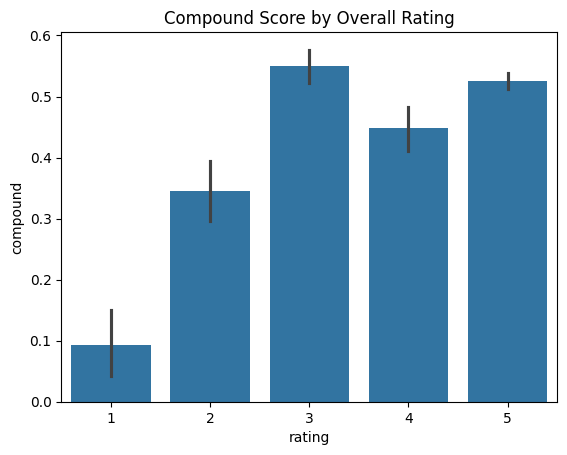

In [23]:
bp = sns.barplot(data=newVADER, x="rating", y="compound")
bp.set_title("Compound Score by Overall Rating")
plt.show()

In [24]:
#COMPARING LEXICONS
    #TEXTBLOB - #TextBlob is a Python library for processing textual data. It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.

In [25]:
#Creating new dataframe for TextBlob results
newBLOB = pd.DataFrame(newdfClean)
newBLOB

,id,date,Originalreview,reviews,rating
0,1,7/23/2014,No issues.,issue,4
1,2,10/25/2013,"Purchased this for my device, it worked as adv...",Purchased device work advertised never much ...,5
2,3,12/23/2012,it works as expected. I should have sprung for...,work expect sprung high capacity think make ...,4
3,4,11/21/2013,This think has worked out great.Had a diff. br...,think work great diff bran gb card go south ...,5
4,5,7/13/2013,"Bought it with Retail Packaging, arrived legit...",Bought Retail Packaging arrive legit orange ...,5
...,...,...,...,...,...
6910,6911,"01 5, 2014",Set in 2032 &#34;Crucifying Angel&#34; by P.I...,Set Crucifying Angel P Barrington futuristic...,3
6911,6912,"05 25, 2013",The story moves along rather slowly. I prefer ...,story move along rather slowly prefer fast p...,3
6912,6913,"10 13, 2012",I had a hard time to keep interest in this boo...,hard time keep interest book really enjoy bo...,3
6913,6914,"09 8, 2013",Good reading bit slow but gets interesting so ...,Good reading bit slow get interest u put nee...,3


In [26]:
newBLOB['Subjectivity'] = newBLOB['reviews'].apply(getSubjectivity)
newBLOB['Polarity'] = newBLOB['reviews'].apply(getPolarity)
newBLOB['Analysis'] = newBLOB['Polarity'].apply(analysis)
newBLOB.head()

,id,date,Originalreview,reviews,rating,Subjectivity,Polarity,Analysis
0,1,7/23/2014,No issues.,issue,4,0.000000,0.000000,Neutral
1,2,10/25/2013,"Purchased this for my device, it worked as adv...",Purchased device work advertised never much ...,5,0.200000,-0.100000,Negative
2,3,12/23/2012,it works as expected. I should have sprung for...,work expect sprung high capacity think make ...,4,0.635000,0.031667,Positive
3,4,11/21/2013,This think has worked out great.Had a diff. br...,think work great diff bran gb card go south ...,5,0.616667,0.350000,Positive
4,5,7/13/2013,"Bought it with Retail Packaging, arrived legit...",Bought Retail Packaging arrive legit orange ...,5,0.360000,0.386667,Positive


In [27]:
newBLOB.Analysis.value_counts()

Positive    5721
Negative     819
Neutral      375
Name: Analysis, dtype: int64

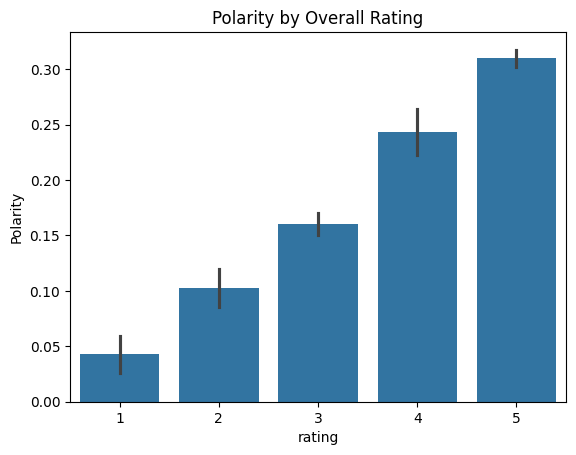

In [28]:
newblobplot = sns.barplot(data=newBLOB, x="rating", y="Polarity")
newblobplot.set_title("Polarity by Overall Rating")
plt.show()

In [31]:
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(newdf_raw["Lemma"], newdf_raw["sentiment"], test_size=0.3, random_state=42)

In [32]:
new_x_train

3980      well make replacement part use system Reads ...
5528      husband sometimes like weekend edition sport...
5994      ever jump middle movie try figure Well cours...
3608      expect great transfer time like get nice com...
4938      Combination Online Print version WSJ cost pe...
                              ...                        
3772      GB card fast Great store video music whateve...
5191      download book Kindle amazon read one day fab...
5226      Despite negative comment read book prequel L...
5390      maybe read many eacute nage story story work...
860       Previously purchase two ADATA microsd card o...
Name: Lemma, Length: 4840, dtype: object

In [33]:
new_y_train

3980    1
5528    0
5994   -1
3608    1
4938   -1
       ..
3772    1
5191    0
5226   -1
5390    0
860     1
Name: sentiment, Length: 4840, dtype: int64

In [34]:
print("Shape of training data (X_train):", new_x_train.shape)
print("Shape of testing data (X_test):", new_x_test.shape)
print("Shape of training labels (y_train):", new_y_train.shape)
print("Shape of testing labels (y_test):", new_y_test.shape)

Shape of training data (X_train): (4840,)
Shape of testing data (X_test): (2075,)
Shape of training labels (y_train): (4840,)
Shape of testing labels (y_test): (2075,)


In [35]:
new_x_train_vectorized = vectorizer.fit_transform(new_x_train)
new_x_test_vectorized = vectorizer.transform(new_x_test)

In [36]:
newNaive = sklearn.naive_bayes.MultinomialNB()
newNaive.fit(new_x_train_vectorized, new_y_train)
newpredictions = newNaive.predict(new_x_test_vectorized)
print("Accuracy:", accuracy_score(new_y_test, newpredictions))
print("\nClassification Report:\n", classification_report(new_y_test, newpredictions))
print("\nConfusion Matrix:\n", confusion_matrix(new_y_test, newpredictions))

Accuracy: 0.8371084337349397

Classification Report:
               precision    recall  f1-score   support

          -1       0.63      0.27      0.37       334
           0       0.65      0.77      0.70       384
           1       0.92      1.00      0.95      1357

    accuracy                           0.84      2075
   macro avg       0.73      0.68      0.68      2075
weighted avg       0.82      0.84      0.81      2075


Confusion Matrix:
 [[  89  158   87]
 [  51  295   38]
 [   2    2 1353]]


In [ ]:
#Naive Bayes model using the raw unprocessed text to compare accuracy with model using processed text

In [38]:
new_X_train, new_X_test, new_Y_train, new_Y_test = train_test_split(newdf_raw["reviewText"], newdf_raw["sentiment"], test_size=0.3, random_state=42)

In [39]:
new_X_train

3980    A well made replacement part for use with my s...
5528    My husband sometimes likes the weekend edition...
5994    Did you ever jump into the middle of a movie a...
3608    I wasn't expecting great transfer times like I...
4938    My Combination Online/Print version of the WSJ...
                              ...                        
3772    This 32GB card is fast.  Great for storing vid...
5191    I downloaded this book on my Kindle from amazo...
5226    Despite the negative comments, I read this boo...
5390    So maybe I have read too many m&eacute;nage st...
860     Previously purchased two ADATA microsd cards o...
Name: reviewText, Length: 4840, dtype: object

In [40]:
new_Y_train

3980    1
5528    0
5994   -1
3608    1
4938   -1
       ..
3772    1
5191    0
5226   -1
5390    0
860     1
Name: sentiment, Length: 4840, dtype: int64

In [41]:
print("Shape of training data (X_train):", new_X_train.shape)
print("Shape of testing data (X_test):", new_X_test.shape)
print("Shape of training labels (y_train):", new_Y_train.shape)
print("Shape of testing labels (y_test):", new_Y_test.shape)

Shape of training data (X_train): (4840,)
Shape of testing data (X_test): (2075,)
Shape of training labels (y_train): (4840,)
Shape of testing labels (y_test): (2075,)


In [42]:
new_X_train_vectorized = vectorizer.fit_transform(new_X_train)
new_X_test_vectorized = vectorizer.transform(new_X_test)
rawNBnew = sklearn.naive_bayes.MultinomialNB()
rawNBnew.fit(new_X_train_vectorized, new_Y_train)

MultinomialNB()

In [43]:
newrawPredictions = rawNBnew.predict(new_X_test_vectorized)

In [44]:
print("Accuracy:", accuracy_score(new_Y_test, newrawPredictions))
print("\nClassification Report:\n", classification_report(new_Y_test, newrawPredictions))
print("\nConfusion Matrix:\n", confusion_matrix(new_Y_test, newrawPredictions))

Accuracy: 0.843855421686747

Classification Report:
               precision    recall  f1-score   support

          -1       0.68      0.29      0.41       334
           0       0.67      0.78      0.72       384
           1       0.91      1.00      0.95      1357

    accuracy                           0.84      2075
   macro avg       0.75      0.69      0.69      2075
weighted avg       0.83      0.84      0.82      2075


Confusion Matrix:
 [[  98  146   90]
 [  44  300   40]
 [   3    1 1353]]


In [ ]:
#Better precision results for negative and neutral reviews. Better support as well. Could be better.

In [45]:
#Removing 3-star reviews and getting rid of neutral classification to focus on strictly neutral and negative

In [47]:
df = pd.read_csv('amazon_reviews_expanded.csv')
df_filtered = df[df['overall'] != 3]
print("Number of rows after filtering out 3-star reviews:", len(df_filtered))

Number of rows after filtering out 3-star reviews: 5607


In [50]:
df_filtered['reviewText'] = df_filtered['reviewText'].astype(str)
df_filtered['Cleaned Reviews'] = df_filtered['reviewText'].apply(clean)
df_filtered['POS tagged'] = df_filtered['Cleaned Reviews'].apply(token_stop_pos)
df_filtered['Lemma'] = df_filtered['POS tagged'].apply(lemmatize)
df_filtered['sentiment'] = df_filtered['overall'].apply(lambda x: 1 if x > 3 else -1)
df_filtered.head()

<ipython-input-50-f41930828a5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['reviewText'] = df_filtered['reviewText'].astype(str)
<ipython-input-50-f41930828a5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cleaned Reviews'] = df_filtered['reviewText'].apply(clean)
<ipython-input-50-f41930828a5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,Cleaned Reviews,POS tagged,Lemma,sentiment
0,0,NaN,4,No issues.,7/23/2014,138.0,0.0,0.0,0.0,0.0,0.0,0.0,No issues,"[(issues, n)]",issue,1
1,1,0mie,5,"Purchased this for my device, it worked as adv...",10/25/2013,409.0,0.0,0.0,0.0,0.0,0.0,0.0,Purchased this for my device it worked as adve...,"[(Purchased, v), (device, n), (worked, v), (ad...",Purchased device work advertised never much ...,1
2,2,1K3,4,it works as expected. I should have sprung for...,12/23/2012,715.0,0.0,0.0,0.0,0.0,0.0,0.0,it works as expected I should have sprung for ...,"[(works, v), (expected, v), (sprung, n), (high...",work expect sprung high capacity think make ...,1
3,3,1m2,5,This think has worked out great.Had a diff. br...,11/21/2013,382.0,0.0,0.0,0.0,0.0,0.0,0.0,This think has worked out great Had a diff bra...,"[(think, n), (worked, v), (great, a), (diff, n...",think work great diff bran gb card go south ...,1
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",7/13/2013,513.0,0.0,0.0,0.0,0.0,0.0,0.0,Bought it with Retail Packaging arrived legit ...,"[(Bought, v), (Retail, n), (Packaging, n), (ar...",Bought Retail Packaging arrive legit orange ...,1


In [52]:
fil_X_train, fil_X_test, fil_y_train, fil_y_test = train_test_split(df_filtered['Lemma'], df_filtered['sentiment'], test_size=0.2, random_state=40)

In [54]:
fil_X_train_vectorized = vectorizer.fit_transform(fil_X_train)
fil_X_test_vectorized = vectorizer.transform(fil_X_test)
filNB = sklearn.naive_bayes.MultinomialNB()
filNB.fit(fil_X_train_vectorized, fil_y_train)

MultinomialNB()

In [55]:
filPredictions = filNB.predict(fil_X_test_vectorized)


In [56]:
print("Accuracy:", accuracy_score(fil_y_test, filPredictions))
print("\nClassification Report:\n", classification_report(fil_y_test, filPredictions))
print("\nConfusion Matrix:\n", confusion_matrix(fil_y_test, filPredictions))

Accuracy: 0.946524064171123

Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.78      0.86       243
           1       0.94      0.99      0.97       879

    accuracy                           0.95      1122
   macro avg       0.96      0.89      0.91      1122
weighted avg       0.95      0.95      0.94      1122


Confusion Matrix:
 [[189  54]
 [  6 873]]


In [57]:
#Much better precision for negative reviews. The accuracy went back up as well.

In [58]:
#TF-IDF re-run

In [64]:
tf_X_train, tf_X_test, tf_Y_train, tf_Y_test = train_test_split(newdf_raw["Lemma"], newdf_raw["sentiment"], test_size=0.3, random_state=42)

In [66]:
X_train_tf = tfidf_vectorizer.fit_transform(tf_X_train)
X_test_tf = tfidf_vectorizer.transform(tf_X_test)
nbTf = MultinomialNB()
nbTf.fit(X_train_tf, tf_Y_train)

MultinomialNB()

In [68]:
tfPred = nbTf.predict(X_test_tf)

In [70]:
print("Accuracy:", accuracy_score(tf_Y_test, tfPred))
print("\nClassification Report:\n", classification_report(tf_Y_test, tfPred))
print("\nConfusion Matrix:\n", confusion_matrix(tf_Y_test, tfPred))

Accuracy: 0.8101204819277108

Classification Report:
               precision    recall  f1-score   support

          -1       0.72      0.13      0.22       334
           0       0.64      0.73      0.68       384
           1       0.86      1.00      0.93      1357

    accuracy                           0.81      2075
   macro avg       0.74      0.62      0.61      2075
weighted avg       0.80      0.81      0.77      2075


Confusion Matrix:
 [[  44  157  133]
 [  17  280   87]
 [   0    0 1357]]


In [ ]:
#TF-IDF with 3-star reviews filtered out

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df_filtered['Lemma'], df_filtered['sentiment'], test_size=0.2, random_state=40)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [62]:
tfPredictions = nb_classifier.predict(X_test_tfidf)

In [63]:
print("Accuracy:", accuracy_score(y_test, tfPredictions))
print("\nClassification Report:\n", classification_report(y_test, tfPredictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, tfPredictions))

Accuracy: 0.9251336898395722

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.65      0.79       243
           1       0.91      1.00      0.95       879

    accuracy                           0.93      1122
   macro avg       0.96      0.83      0.87      1122
weighted avg       0.93      0.93      0.92      1122


Confusion Matrix:
 [[159  84]
 [  0 879]]
